# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Mellino

Student name: Daniele
    
ID:2013373

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2013373
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

#print(np.shape(y_train))

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [58 59 61 59 54 62 60 67 56 64]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


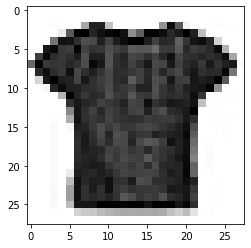

LABEL: 6
INPUT:


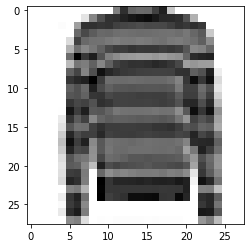

LABEL: 2
INPUT:


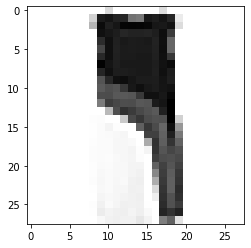

LABEL: 3
INPUT:


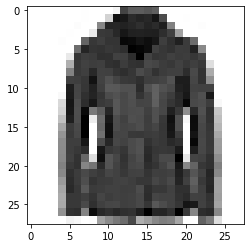

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,599)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM

# My CODE :
linear_SVM= SVC(kernel='linear')
classifier= GridSearchCV(linear_SVM, parameters, cv=4)

classifier.fit(X_train, y_train)


print ('RESULTS FOR LINEAR KERNEL')
%precision 3
print("Best parameters set found:")
# My code:
#Parameter setting that gave the best results on the hold out data.
print(classifier.best_params_)

print("Score with best parameters:")
#My code:
#Mean cross-validated score of the best_estimator
print(classifier.best_score_)

print("All scores on the grid:")
# My code
#memo:cv_result is a dictionary
print(classifier.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.7716666666666666
All scores on the grid:
[0.577 0.763 0.772 0.77  0.77  0.77 ]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel


# My CODE :
polinomial_2_SVM=SVC(kernel='poly',degree=2)
classifier_p_2=GridSearchCV(polinomial_2_SVM,parameters,cv=4)
classifier_p_2.fit(X_train,y_train)
print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
# My CODE :
print(classifier_p_2.best_params_)
print("Score with best parameters:")
# My CODE :
print(classifier_p_2.best_score_)
print("\nAll scores on the grid:")
# My CODE :
print(classifier_p_2.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.7633333333333333

All scores on the grid:
[0.737 0.763 0.763 0.758 0.763 0.763 0.763 0.763 0.763]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

#My CODE:
polinomial_4_SVM=SVC(kernel='poly',degree=4)
classifier_p_4=GridSearchCV(polinomial_4_SVM,parameters,cv=4)
classifier_p_4.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
# My CODE
print(classifier_p_4.best_params_)

print("Score with best parameters:")
# My CODE
print(classifier_p_4.best_score_)
print("\nAll scores on the grid:")
# My CODE
print(classifier_p_4.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.7133333333333333

All scores on the grid:
[0.697 0.707 0.707 0.713 0.707 0.707 0.707 0.707 0.707]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [26]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

#My Code:

print ('RESULTS FOR rbf KERNEL')
radial_SVM= SVC(kernel='rbf')
classifier_rad= GridSearchCV(radial_SVM, parameters, cv=4)

classifier_rad.fit(X_train, y_train)


print("Best parameters set found:")
# My CODE
print(classifier_rad.best_params_)
print("Score with best parameters:")
# My CODE
print(classifier_rad.best_score_)
print("\nAll scores on the grid:")
# My CODE
#print(classifier_rad.cv_results_['mean_test_score'])
a=pd.DataFrame(classifier_rad.cv_results_)#it takes time, that's why I use this visualization here only
print(a.iloc[:,6:14])


RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.8366666666666667

All scores on the grid:
                        params  split0_test_score  split1_test_score  \
0   {'C': 0.5, 'gamma': 0.005}           0.768000           0.776000   
1    {'C': 0.5, 'gamma': 0.05}           0.778667           0.749333   
2     {'C': 0.5, 'gamma': 0.5}           0.120000           0.120000   
3       {'C': 0.5, 'gamma': 5}           0.120000           0.120000   
4     {'C': 5, 'gamma': 0.005}           0.832000           0.821333   
5      {'C': 5, 'gamma': 0.05}           0.802667           0.810667   
6       {'C': 5, 'gamma': 0.5}           0.141333           0.133333   
7         {'C': 5, 'gamma': 5}           0.120000           0.120000   
8    {'C': 50, 'gamma': 0.005}           0.816000           0.818667   
9     {'C': 50, 'gamma': 0.05}           0.802667           0.810667   
10     {'C': 50, 'gamma': 0.5}           0.141333           0

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

## Answer:
We got the best result with the Radial Basis Function kernel, with $C=50$ and $\gamma = 0.005$, and (as we can see in the table upon) $C=500$ and $\gamma = 0.005$. In this two cases we see that the best score is $\sim 0.797$. Using different degree of the polinomial kernels, we observe that the best score decrease as the degree increases. 

|degree|b_score|
|----- |-------|
| 1    |   0.77|
|    2 |   0.76|
|    4 |   0.73|


## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

#After selecting the model, the final hyp, is obtained from
#training on the entire training set

# USE YOUR OPTIMAL PARAMETERS
best_SVM = SVC(C=50,gamma=0.005,kernel='rbf')   
best_SVM.fit(X_train, y_train)


# My code:
training_error= 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.198000


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1-train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1-test_error))
    
    plt.show()

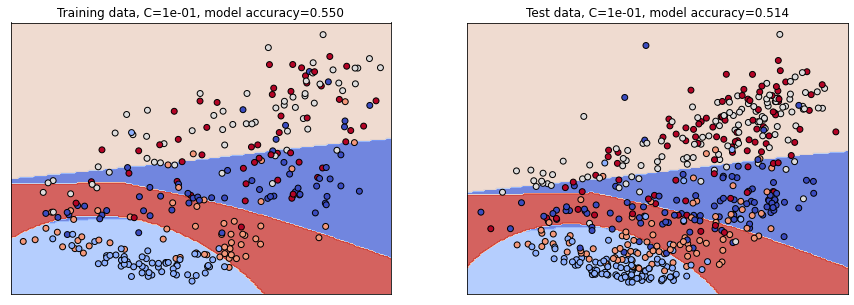

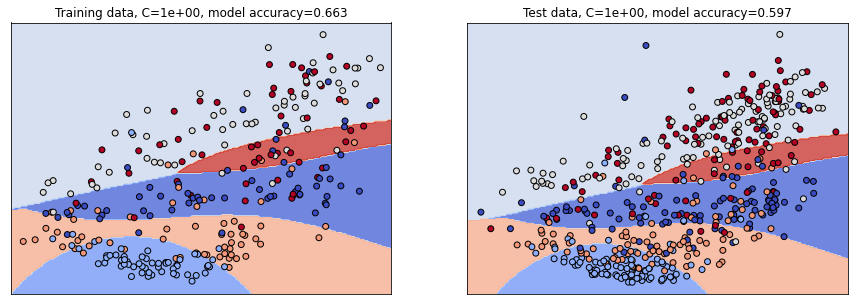

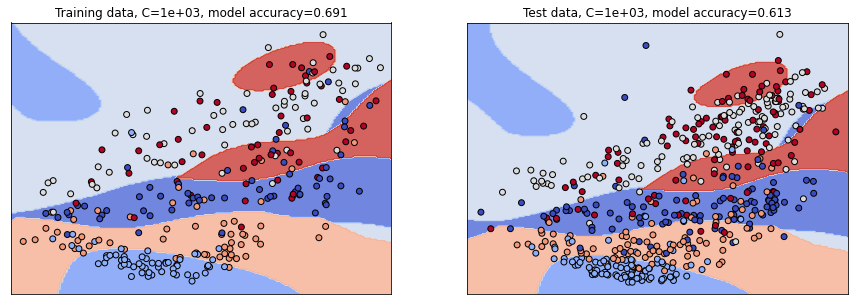

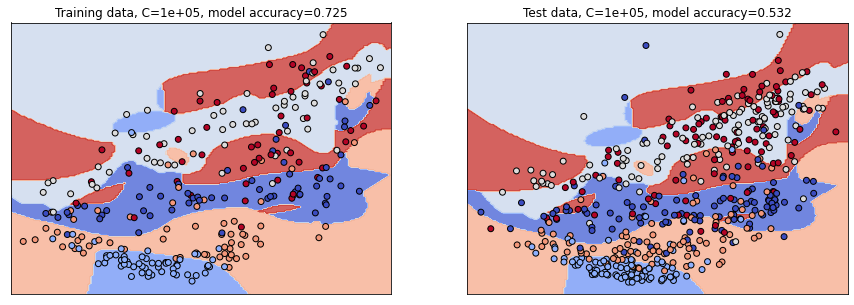

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm =SVC(C=C,gamma=gamma,kernel='rbf')   #My CODE
    my_svm.fit(X_train_pca, y_train_plot)
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    train_err= 1. - my_svm.score(X_train_pca,y_train_plot)
    test_err = 1. - my_svm.score(X_test_pca,y_test_plot)

    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot,train_err, test_err)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

## Answer:
C is the inverse of $\lambda$, thus it controls the trade-off between empirical error and complexity. As we can see, when C is highter we have smaller training error but the shape of the boundaries is more complex (we could risk overfitting). In contrast when C is smaller we have higher training error and easier shape. 

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


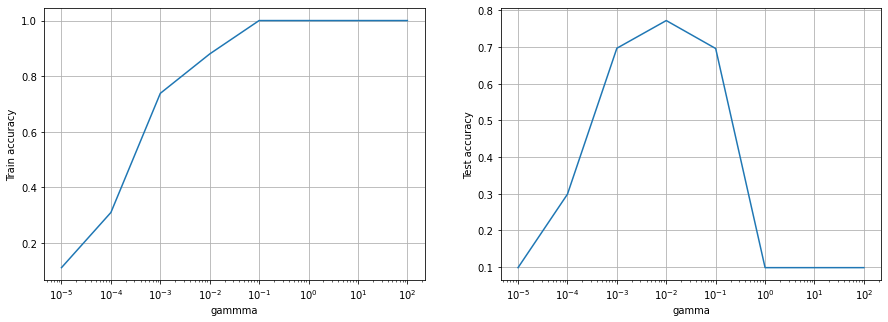

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for gamma in gamma_values:
    my_svm =SVC(C=1,gamma=gamma,kernel='rbf')   #My CODE
    my_svm.fit(X_train, y_train)
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    train_acc_list.append( my_svm.score(X_train,y_train) )
    test_acc_list.append( my_svm.score(X_test,y_test) )
    

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## Answer:
The gamma parameter is the inverse of $\sigma$, which is the standard deviation of the rbf kernel, thus it is linked with the concept of "far" or "close" in the kernel function.
The gamma parameter give us informations about the trade-off between precisely fit the training set or finding a less accurate solution that instead is more general.

As we can see in the plots, when gamma is small the solution is less accurate, when gamma is higher we are more accurate since we fall in the overfitting. For instance when gamma is higher or equal to 1 we can sample every data in the training set, however when we go to the test set, we pick nothing.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [132 163 141 157 140 154 149 147 179 138]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

# My code:
best_SVM = SVC(C=50,gamma=0.005,kernel='rbf')   
best_SVM.fit(X_train, y_train)

training_error= 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000667
Best SVM test error: 0.175248


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model
from sklearn import metrics
# My CODE
#reg
regularization = linear_model.LogisticRegression(C=1e11, max_iter = 300 )
regularization.fit(X_train,y_train)

#prediction on the training
y_pred_train=regularization.predict(X_train)
accuracy_train = metrics.accuracy_score(y_pred_train,y_train)

#prediction on the test
y_pred_test=regularization.predict(X_test)
accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
#errors:

training_error = 1 - accuracy_train
test_error = 1 - accuracy_test


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.228684


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:
# My CODE:
#reg
regularization2 = linear_model.LogisticRegression(C=1, max_iter =800 )
regularization2.fit(X_train,y_train)

#prediction on the training
y_pred_train=regularization2.predict(X_train)
accuracy_train = metrics.accuracy_score(y_pred_train,y_train)

#prediction on the test
y_pred_test=regularization2.predict(X_test)
accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
#errors:

training_error = 1 - accuracy_train
test_error = 1 - accuracy_test


print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.008667
Best regularized logistic regression test error: 0.192325


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

## Answer:
- In the case of $m=600$ the training error for the best model and the best choice of parameters is 0.0; it is due to the instability of the algorithm for small number of data and, of course, to overfit. In fact the test error is 0.198. When I use m = 1500 the training error is $\sim 0.001$ and the test error become $0.175$. The performance of the algorithm increase  when I use more data, as we expect, even though we need more computational time.

- Regarding the Logistic regression we can see that the algorithm that use regolarization(C=1) is more stable and less affected by overfit than the one without regularization, which has worse performances (higher test error and null training error). Comparison the SVM and the Logistic Regression, we can notice that SVM gives better results, nevertheless Logistic Regression is faster. 



## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


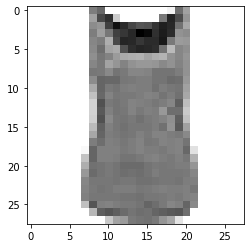

LABEL: 0
Index is: 12
LR predicted: 6
SVM predicted: 0


In [21]:
LR_prediction =regularization2.predict(X_test) # My CODE
SVM_prediction =classifier_rad.predict(X_test) # My CODE

# My CODE
for i in range(len(y_test)):
    if LR_prediction[i]!=SVM_prediction[i] and SVM_prediction[i]==y_test[i]:
        plot_input(X_test,y_test,i)
        print("Index is:", i)
        print("LR predicted:", LR_prediction[i])
        print("SVM predicted:", SVM_prediction[i])
        break
        

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM =metrics.confusion_matrix(y_test, SVM_prediction) # My CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =metrics.confusion_matrix(y_test, LR_prediction)  # My CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5868 5837 5859 5843 5860 5846 5851 5853 5821 5862]

 Confusion matrix SVM  
 
 [[4516    9  101  386   56    4  709    0   86    1]
 [ 103 5358   86  202   65    0   22    0    1    0]
 [ 194    1 4379   76  543    3  603    0   59    1]
 [ 290   67  103 4906  262    0  183    0   31    1]
 [  36    4  963  276 3902    3  653    0   22    1]
 [   5    0    2   19    0 4977   30  418   51  344]
 [1248   11  961  227  441    4 2842    0  115    2]
 [   0    0    0    0    0  206    0 5230    5  412]
 [  20    4   35   32   45   88  108   31 5448   10]
 [   2    0    1    8    0  100    5  216    6 5524]]

 Confusion matrix SVM (normalized)   
 
 [[0.77 0.   0.02 0.07 0.01 0.   0.12 0.   0.01 0.  ]
 [0.02 0.92 0.01 0.03 0.01 0.   0.   0.   0.   0.  ]
 [0.03 0.   0.75 0.01 0.09 0.   0.1  0.   0.01 0.  ]
 [0.05 0.01 0.02 0.84 0.04 0.   0.03 0.   0.01 0.  ]
 [0.01 0.   0.16 0.05 0.67 0.   0.11 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.85 0.01 0.07 0.0

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


## Answer:
Looking at the matrices, we can notice that the worst classified class are: Shirt, Pullover, T-shirt/top, Coat.
Both the two algorithm have difficulties to differentiate between this classes, for instance they have problem to distinguish shirt from T-shirt/top, Pullover from Coat and Shirt etc.. 
We can also spot that classes like: Bag, Ankle Boot and Trouser is very well classified.

Therefore we can say that the classes similiar with each other in shape is classified with a low accuracy (a shirt is similiar to a t-shirt).
In contrast unique classes, like Trouser or Bag can be easily recognize.
    